In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

1. 读取CSV文件

In [7]:
df = pd.read_csv("Iris.csv")

In [9]:
print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


2. K-Means聚类

提取特征数据

In [13]:
X = df.iloc[:, :4]

数据标准化

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

训练模型

In [19]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    algorithm="lloyd",  # 明确指定经典算法
    n_init="auto"       # 自动选择初始化次数
)
df['cluster'] = kmeans.fit_predict(X_scaled)

H:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3. 结果分析与可视化

查看聚类与真实类别对比

In [45]:
# 假设真实类别在最后一列，聚类结果在新增列
cross_tab = pd.crosstab(df.iloc[:, -2], df.iloc[:, -1], margins=True)  # -2是真实类别列，-1是聚类结果列
cross_tab.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Total']
print("聚类结果与真实类别对比：\n", cross_tab)

聚类结果与真实类别对比：
                  Cluster 0  Cluster 1  Cluster 2  Total
Iris-setosa                                            
Iris-setosa              0         31         18     49
Iris-versicolor         46          0          4     50
Iris-virginica          50          0          0     50
All                     96         31         22    149


PCA降维可视化

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

真实类别分布

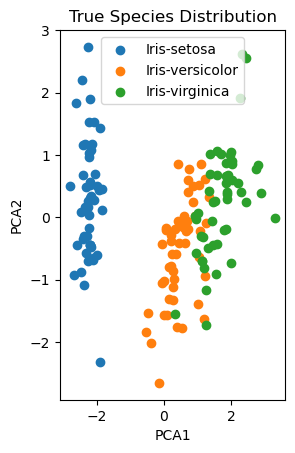

In [47]:
plt.subplot(121)
# 假设真实类别在最后一列(索引为3)
for species in df.iloc[:, -2].unique():  # 使用iloc定位真实类别列
    plt.scatter(
        X_pca[df.iloc[:, -2] == species, 0],  # X坐标
        X_pca[df.iloc[:, -2] == species, 1],  # Y坐标
        label=species
    )
plt.title('True Species Distribution')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

聚类结果分布

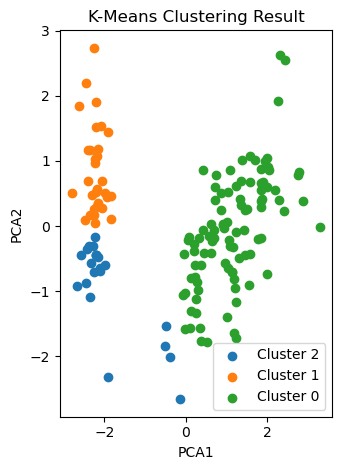

In [34]:
plt.subplot(122)
for cluster in df['cluster'].unique():
    plt.scatter(
        X_pca[df['cluster'] == cluster, 0],
        X_pca[df['cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('K-Means Clustering Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

plt.tight_layout()
plt.show()